<p style="background-color:#D2D4C8; font-family:ui-rounded; color:#FF0000; font-size:200%; text-align:center; border-radius:10px;">Dataset Link</p>


<p style="background-color:#FFA500; font-family:ui-rounded; color:#008000; font-size:200%; text-align:center; border-radius:10px; padding: 20px;">
    <a href="https://www.kaggle.com/code/triblex/face-mask-detection-99" style="text-decoration: none; color: #FFFFFF; font-weight: bold; font-size: 24px;">
        Face Mask Detection - 99%
    </a>
</p>


<p style="background-color:#D2D4C8;font-family:ui-rounded;color:#FF0000;font-size:200%;text-align:center;border-radius:10px 10px;">Import Needed Libraries</p>


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.utils import plot_model #for model visualization

2024-04-25 03:29:09.335300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 03:29:09.335412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 03:29:09.456678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<p style="background-color:#A5C8E1; font-family: Arial, sans-serif; color:#1F497D; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Loading data for training</p>


In [2]:
data_with_mask_dir = 'data/with_mask'
data_without_mask_dir = 'data/without_mask'

In [3]:
data_with_mask= os.listdir(data_with_mask_dir)[:5]
data_without_mask= os.listdir(data_without_mask_dir)[:5]

<p style="background-color:#F7CAC9; font-family: 'Times New Roman', Times, serif; color:#800000; font-size:150%; text-align:center; padding: 15px; border-radius:20px;">Printing some samples</p>


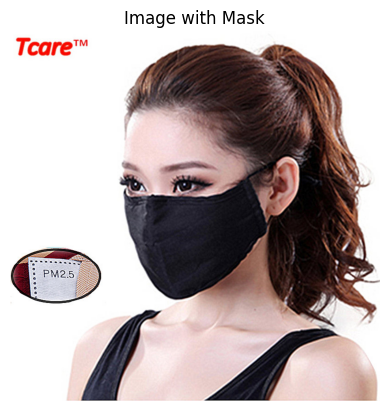

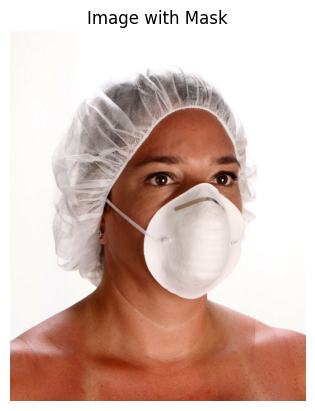

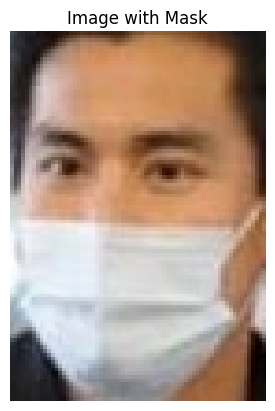

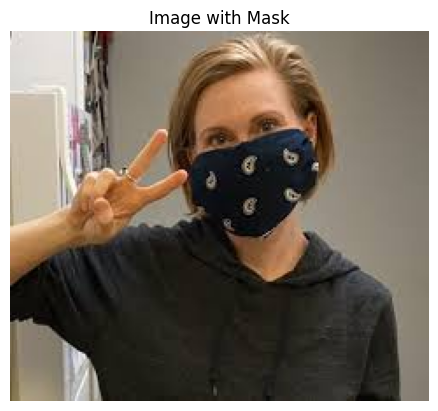

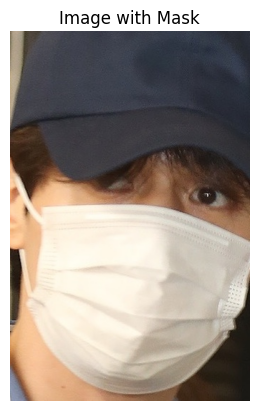

In [4]:
# Print the first five images with mask
for img_file in data_with_mask:
    img_path = os.path.join(data_with_mask_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Image with Mask')
    plt.axis('off')
    plt.show()

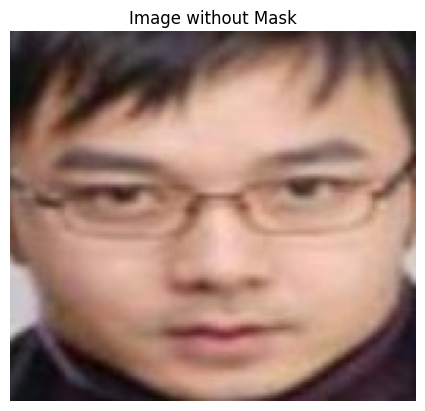

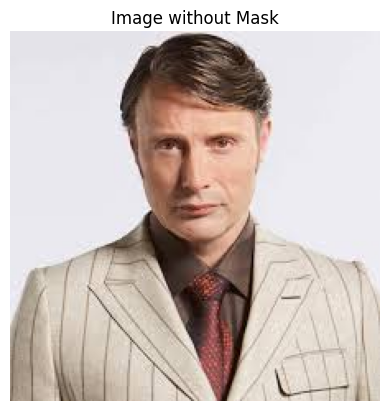

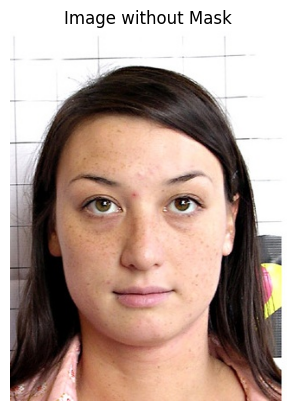

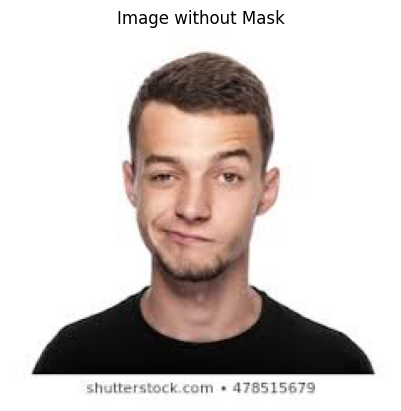

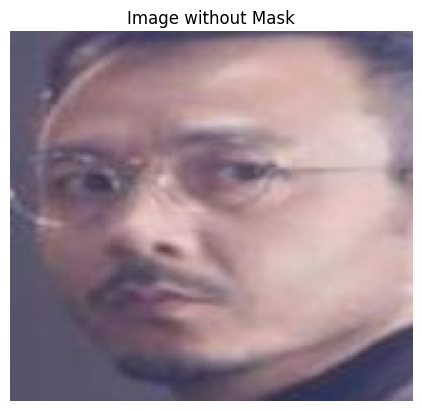

In [5]:
# Print the first five images without mask
for img_file in data_without_mask:
    img_path = os.path.join(data_without_mask_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Image without Mask')
    plt.axis('off')
    plt.show()

## **<font color = #9b7a5e>Preprocessing</font>**

In [6]:
data_with_mask= os.listdir(data_with_mask_dir)
data_without_mask= os.listdir(data_without_mask_dir)

In [7]:
print('Number of without mask images:', len(data_without_mask))

Number of without mask images: 3828


In [8]:
print('Number of with mask images:', len(data_with_mask))

Number of with mask images: 3725


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#5E4955; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Creating Labels 0 &gt;&gt; without mask && 1 &gt;&gt; with mask</p>


In [9]:
with_mask_labels = [1]*len(data_with_mask)
print(f"With Mask labels" ,with_mask_labels[0:10])

without_mask_labels = [0]*len(data_without_mask)
print(f"Without Mask Labels", without_mask_labels[0:10])

With Mask labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Without Mask Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<p style="background-color:#F9EBEA; font-family: 'Arial', sans-serif; color:#C0392B; font-size:150%; text-align:center; padding: 15px; border-radius:15px;">Combine Labels</p>


In [10]:
Labels = with_mask_labels + without_mask_labels
print(f"Labels", Labels[0:10])
print(f"Labels", Labels[-10:])


Labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<p style="background-color:#F5F5F5; font-family: Arial, sans-serif; color:#333333; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Resize images and convert to numpy array</p>


In [11]:
#resize images and convert to numpy array

images = []
def load_images_from_folder(folder):
    
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img = img.resize((128,128))
        img = img.convert('RGB')
        images.append(np.array(img))
    return images

with_mask_images = load_images_from_folder('data/with_mask')
without_mask_images = load_images_from_folder('data/without_mask')

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
len(images)

7553

In [13]:
images[0].shape

(128, 128, 3)

In [14]:
X = np.array(images)
Y = np.array(Labels)

In [15]:
print(X.shape)

(7553, 128, 128, 3)


In [16]:
print(Y.shape)

(7553,)


<p style="background-color:#EAECEE; font-family: Arial, sans-serif; color:#34495E; font-size:200%; text-align:center; padding: 20px; border-radius:20px;">Train Test Split</p>


In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (6042, 128, 128, 3)
Shape of Y_train is: (6042,)

Shape of X_test is: (1511, 128, 128, 3)
Shape of Y_test is: (1511,)


## **<font color = #8b7a5e>scaling the data</font>**

In [19]:
#scaling the data
X_train = X_train/255
X_test = X_test/255

<p style="background-color:#F2D7D5; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#A93226; font-size:200%; text-align:center; padding: 20px; border-radius:20px;">Building a Model with ResNet152V2</p>


### **<font color = "blue"> Build Model </font>**

In [27]:
image_size = (128,128)
channels = 3
image_shape = (image_size[0],image_size[1], channels)

base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
     input_shape=image_shape)

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(128, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(64, activation ='relu'),
    Dropout(rate=0.2),
    
    Dense(2, activation ='sigmoid')
    
])


### **<font color = "blue">Model Compiling</font>**

In [28]:
model.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **<font color = "blue">Model Summary</font>**

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ ?                      │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 58,187,904 (221.97 MB)

 Non-trainable params: 143,744 (561.50 KB)

### **<font color = "blue">Model Fitting</font>**

In [30]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 286s 710ms/step - accuracy: 0.8639 - loss: 0.2968 - val_accuracy: 0.9603 - val_loss: 0.0893
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9759 - loss: 0.0800 - val_accuracy: 0.9868 - val_loss: 0.0379
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9875 - loss: 0.0432 - val_accuracy: 0.9917 - val_loss: 0.0218
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.9886 - loss: 0.0383 - val_accuracy: 0.9851 - val_loss: 0.0470
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9923 - loss: 0.0271 - val_accuracy: 0.9851 - val_loss: 0.0546
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9938 - loss: 0.0260 - val_accuracy: 0.9917 - val_loss: 0.0304
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9802 - val_loss: 0.0820
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.9917 - loss: 

### **<font color = "blue">Model Evaluation</font>**

In [31]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.9916 - loss: 0.0388
Test Accuracy = 0.9900727868080139


In [32]:
#Classification Report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       750
           1       0.99      0.99      0.99       761

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511



### **<font color = "blue">Predict Image</font>**

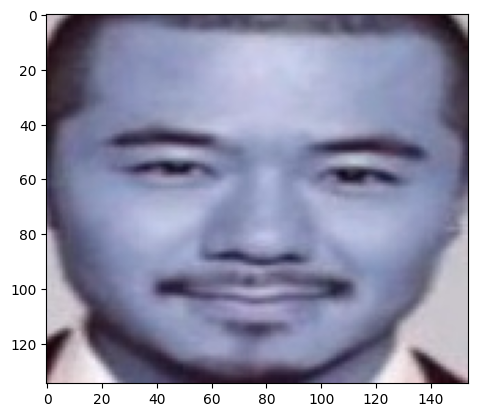

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.9705093  0.02648378]]
0
The person in the image is not wearing a mask


In [37]:
input_image_path = 'data/without_mask/without_mask_10.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

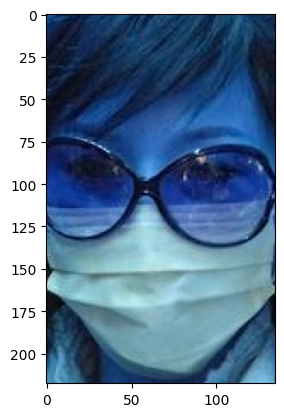

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.0066255 0.9738762]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = 'data/with_mask/with_mask_10.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')